<a href="https://colab.research.google.com/github/matchonerror/happyhouse/blob/main/HappyHouse_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Import File



In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train=h5py.File('/content/drive/MyDrive/Colab Notebooks/train_happy.h5')
test=h5py.File('/content/drive/MyDrive/Colab Notebooks/test_happy.h5')

In [ ]:
X_train=train['train_set_x'][:]
y_train=train['train_set_y'][:]

X_test=test['test_set_x'][:]
y_test=test['test_set_y'][:]

In [ ]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600,)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150,)


# Normalize and reshape

----Normalize is essential for this task because the values on the image range from (0 to 255) for the grayscale image nowadays.

Why 256 bits ? Because normally grayscale in digital world in 8-bits.
So it's 2^8=256 range from 0 to 255
We'll apply MinMaxScaler for this stadardization. To simplify, we'll divide it for 255


--The second question:

Why we need to reshape, why we can't keep the dim the same

--> Y_train shape: (600,)

--You can see the y_train shape just keep the number of training exemples but not the dim of the feauture ( which is smiling or not )


In [ ]:
#Reshape
y_train=y_train.reshape(X_train.shape[0],1)
y_test=y_test.reshape(X_test.shape[0],1)

#Normalization
X_train=X_train/255
X_test=X_test/255


In [ ]:
print(y_train.shape)
print(y_test.shape)

(600, 1)
(150, 1)


In [ ]:
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(y_test.shape))

X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


# Visualization

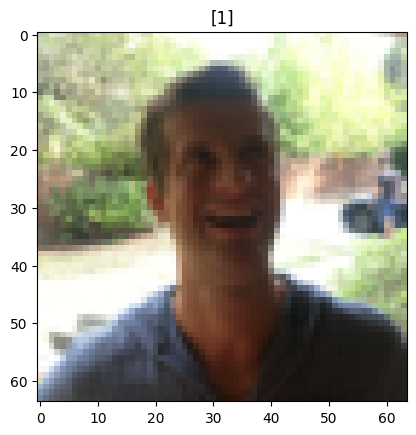

In [ ]:
plt.imshow(X_train[3])
plt.title(y_train[3])
plt.show()

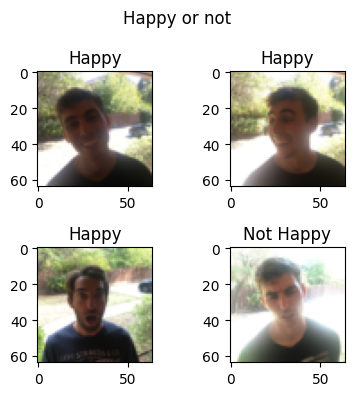

In [ ]:
fig,axes=plt.subplots(2,2, figsize=(4,4))

for i,ax in enumerate(axes.flat):
  index=np.random.randint(X_train.shape[0])
  ax.imshow(X_train[index])
  if y_train[index]==1:
    ax.set_title('Happy')
  else:
    ax.set_title('Not Happy')
  fig.suptitle('Happy or not')
plt.tight_layout()

# Image agumentation

# Define Model

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.layers import Activation

model= Sequential()
model.add(Conv2D(24, (3,3), padding='valid', input_shape=(64,64,3) ))
model.add(BatchNormalization())
model.add(Activation('leaky_relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(28, (3,3), padding='valid' ))
model.add(BatchNormalization())
model.add(Activation('leaky_relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding='valid' ))
model.add(BatchNormalization())
model.add(Activation('leaky_relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), padding='valid' ))
model.add(BatchNormalization())
model.add(Activation('leaky_relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(units=256, activation='leaky_relu'))
model.add(Dropout(0.2))

model.add(Dense(units=128, activation='leaky_relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 24)        672       
                                                                 
 batch_normalization (Batch  (None, 62, 62, 24)        96        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 62, 62, 24)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 24)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 28)        6076      
                                                                 
 batch_normalization_1 (Bat  (None, 29, 29, 28)        1

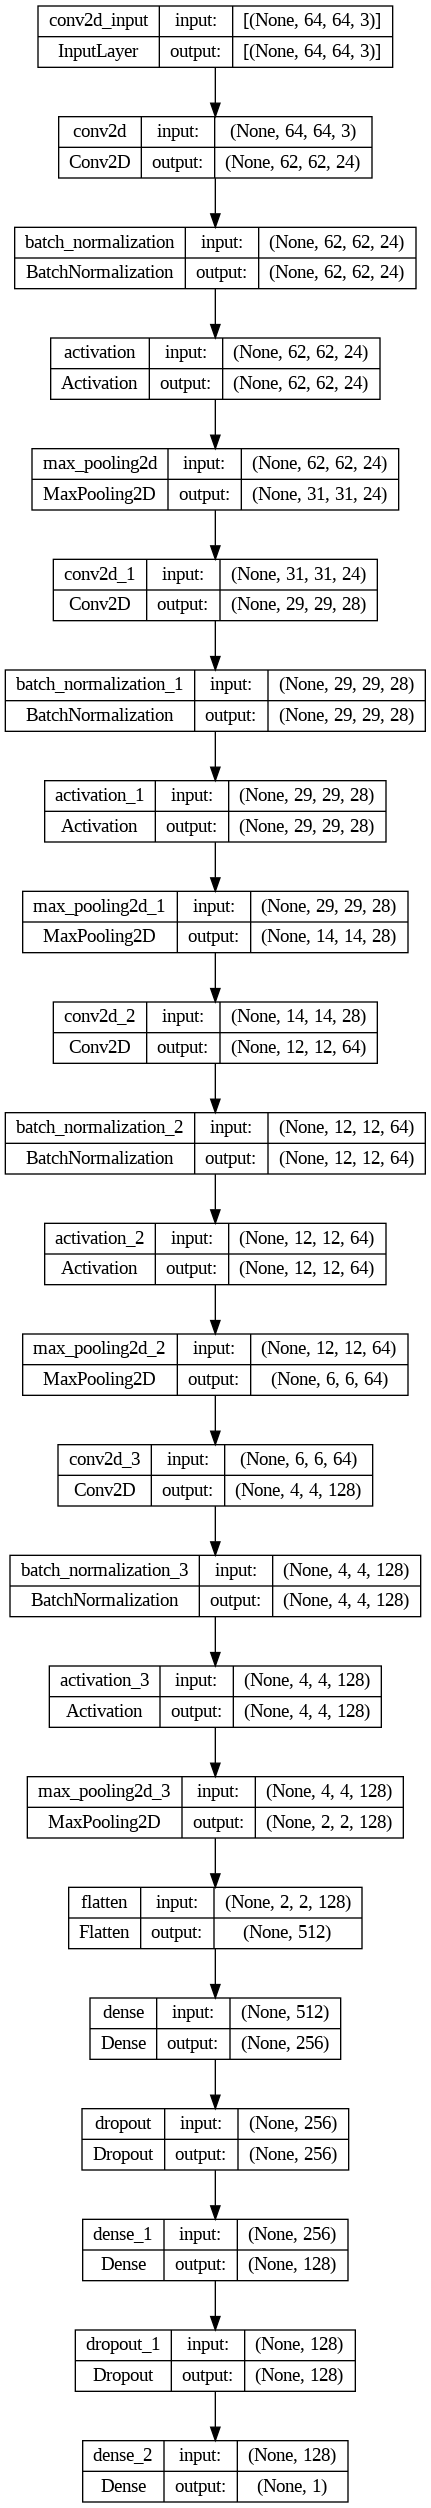

In [ ]:
from keras.utils import plot_model
plot_model(model,
           show_shapes=True
)

In [ ]:
# from keras.callbacks import EarlyStopping
# ealystopping=EarlyStopping('val_accuracy')

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer= tf.keras.optimizers.Adam(),
              metrics=['accuracy'])


hist=model.fit(X_train,y_train,
            epochs=500,
            validation_data=(X_test,y_test))

Epoch 1/500
19/19 [==============================] - 10s 54ms/step - loss: 0.6308 - accuracy: 0.6800 - val_loss: 0.7002 - val_accuracy: 0.4400
Epoch 2/500
19/19 [==============================] - 0s 10ms/step - loss: 0.2747 - accuracy: 0.8767 - val_loss: 0.8002 - val_accuracy: 0.4400
Epoch 3/500
19/19 [==============================] - 0s 10ms/step - loss: 0.1629 - accuracy: 0.9433 - val_loss: 0.9385 - val_accuracy: 0.4400
Epoch 4/500
19/19 [==============================] - 0s 9ms/step - loss: 0.1411 - accuracy: 0.9467 - val_loss: 1.1013 - val_accuracy: 0.4400
Epoch 5/500
19/19 [==============================] - 0s 9ms/step - loss: 0.0448 - accuracy: 0.9833 - val_loss: 0.7777 - val_accuracy: 0.4733
Epoch 6/500
19/19 [==============================] - 0s 9ms/step - loss: 0.0391 - accuracy: 0.9950 - val_loss: 1.1983 - val_accuracy: 0.4400
Epoch 7/500
19/19 [==============================] - 0s 10ms/step - loss: 0.0241 - accuracy: 0.9917 - val_loss: 1.1727 - val_accuracy: 0.4400
Epoch 8/

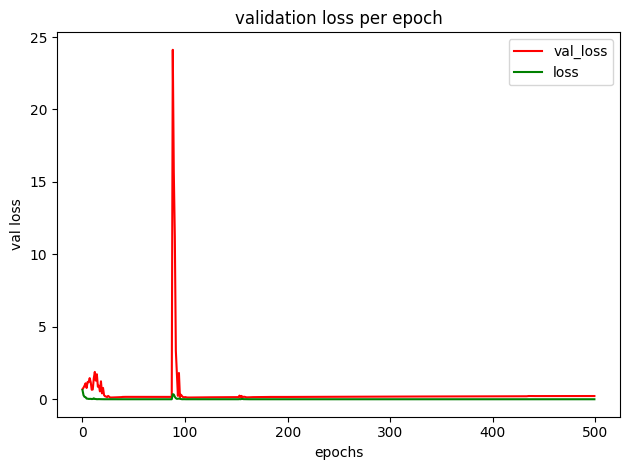

In [ ]:

plt.plot(hist.history['val_loss'],color='r',label='val_loss')
plt.plot(hist.history['loss'],color='g',label='loss')
plt.title('validation loss per epoch')
plt.xlabel('epochs')
plt.ylabel('val loss')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
err_ts,acc_ts=model.evaluate(X_test,y_test)
err_tr,acc_tr=model.evaluate(X_train,y_train)


19/19 [==============================] - 0s 4ms/step - loss: 1.2101e-08 - accuracy: 1.0000


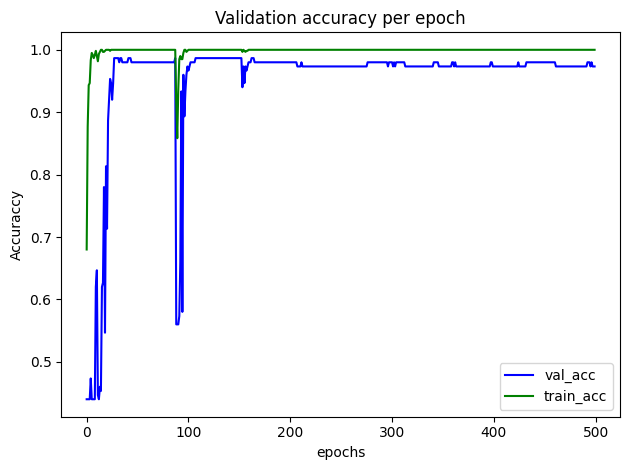

In [ ]:

# plt.plot(hist.history['val_loss'],color='r',label='val_loss')
plt.plot(hist.history['val_accuracy'],color='b',label='val_acc')
plt.plot(hist.history['accuracy'],color='g',label='train_acc')
plt.title('Validation accuracy per epoch')
plt.xlabel('epochs')
plt.ylabel('Accuraccy')
plt.legend()
plt.tight_layout()
plt.show()


# Testing

1/1 [==============================] - 0s 28ms/step
predicted_value=[[1]]
actual value=[1]


Text(0.5, 1.0, '[[1]]')

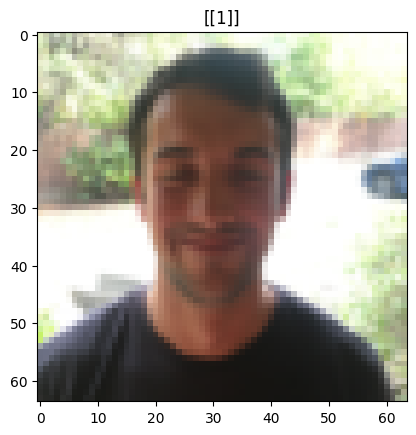

In [ ]:
plt.imshow(X_test[5])
y_proba_5=model.predict(X_test[5].reshape(1,64,64,3))
thresh=0.5
y_binary_5=(y_proba>=thresh).astype(int)
print(f'predicted_value={y_binary_5}')
print(f'actual value={y_test[5]}')
plt.title(y_binary_5)

1/1 [==============================] - 0s 19ms/step


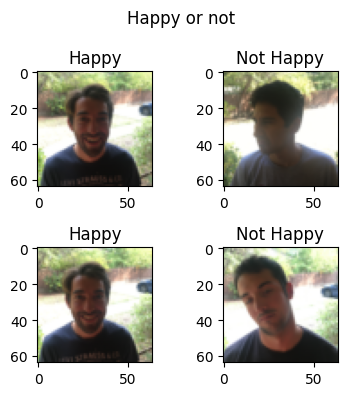

In [ ]:
fig,axes=plt.subplots(2,2,figsize=(4,4))

for i,ax in enumerate(axes.flat):
  index=np.random.randint(X_test.shape[0])
  ax.imshow(X_test[index])
  y_pred=model.predict(X_test[index].reshape(1,64,64,3))
  if y_pred >= 0.5:
    ax.set_title('Happy')
  else:
    ax.set_title('Not Happy')
    fig.suptitle('Happy or not')
  plt.tight_layout()


5/5 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        66
           1       0.98      0.98      0.98        84

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

[[64  2]
 [ 2 82]]


Text(50.722222222222214, 0.5, 'Predicted')

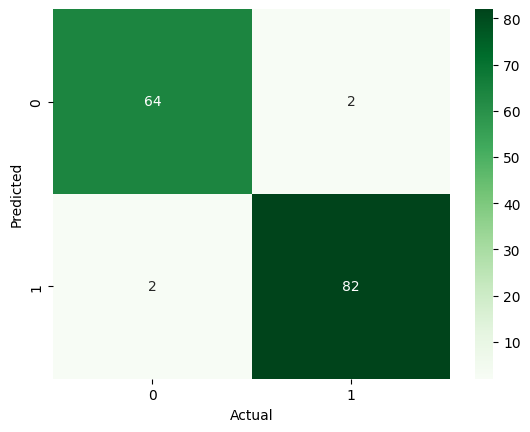

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
y_pred=model.predict(X_test)
y_bin=(y_pred>=0.5).astype(int)
print(classification_report(y_bin,y_test))
print(confusion_matrix(y_bin,y_test))

sns.heatmap(confusion_matrix(y_bin,y_test),annot=True,cmap='Greens')
plt.xlabel('Actual')
plt.ylabel('Predicted')